Martyna Szymańska 245938

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [63]:
education = pd.read_csv('matura_wyniki.csv', sep=';')
education.head()

,Kod,Nazwa,2010[%],2014[%],2018[%],2022[%]
0,200000,DOLNOSLASKIE,82,69,"77,1","74,8"
1,400000,KUJAWSKO-POMORSKIE,83,71,"78,2","76,1"
2,600000,LUBELSKIE,80,70,"79,3","77,1"
3,800000,LUBUSKIE,82,74,"79,7","77,2"
4,1000000,LODZKIE,82,71,"79,3",77


In [64]:
sports_object = pd.read_csv('obiekt_boiska.csv', sep=';')
sports_object.head()

,Kod,Nazwa,stadiony;2010,stadiony;2014,stadiony;2018,stadiony;2022,hale sportowe;2010,hale sportowe;2014,hale sportowe;2018,hale sportowe;2022,...,sale gimnastyczne;2018,sale gimnastyczne;2022,korty tenisowe;2010,korty tenisowe;2014,korty tenisowe;2018,korty tenisowe;2022,plywalnie kryte;2010,plywalnie kryte;2014,plywalnie kryte;2018,plywalnie kryte;2022
0,200000,DOLNOSLASKIE,187,171,211,181,62,76,97,93,...,95,92,146,172,207,200,24,29,55,56
1,400000,KUJAWSKO-POMORSKIE,118,103,112,107,41,50,51,57,...,51,59,68,107,127,122,18,25,28,39
2,600000,LUBELSKIE,125,129,122,132,32,34,30,41,...,69,75,41,72,64,78,13,19,21,27
3,800000,LUBUSKIE,60,77,71,74,28,28,35,38,...,30,30,54,61,59,74,9,11,10,11
4,1000000,LODZKIE,88,124,120,108,52,69,62,71,...,58,76,99,125,160,139,22,27,29,31


opis danych


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Kod_x                   16 non-null     int64 
 1   Nazwa                   16 non-null     object
 2   2010[%]                 16 non-null     int64 
 3   2014[%]                 16 non-null     int64 
 4   2018[%]                 16 non-null     object
 5   2022[%]                 16 non-null     object
 6   Kod_y                   16 non-null     int64 
 7   stadiony;2010           16 non-null     int64 
 8   stadiony;2014           16 non-null     int64 
 9   stadiony;2018           16 non-null     int64 
 10  stadiony;2022           16 non-null     int64 
 11  hale sportowe;2010      16 non-null     int64 
 12  hale sportowe;2014      16 non-null     int64 
 13  hale sportowe;2018      16 non-null     int64 
 14  hale sportowe;2022      16 non-null     int64 
 15  sale gim

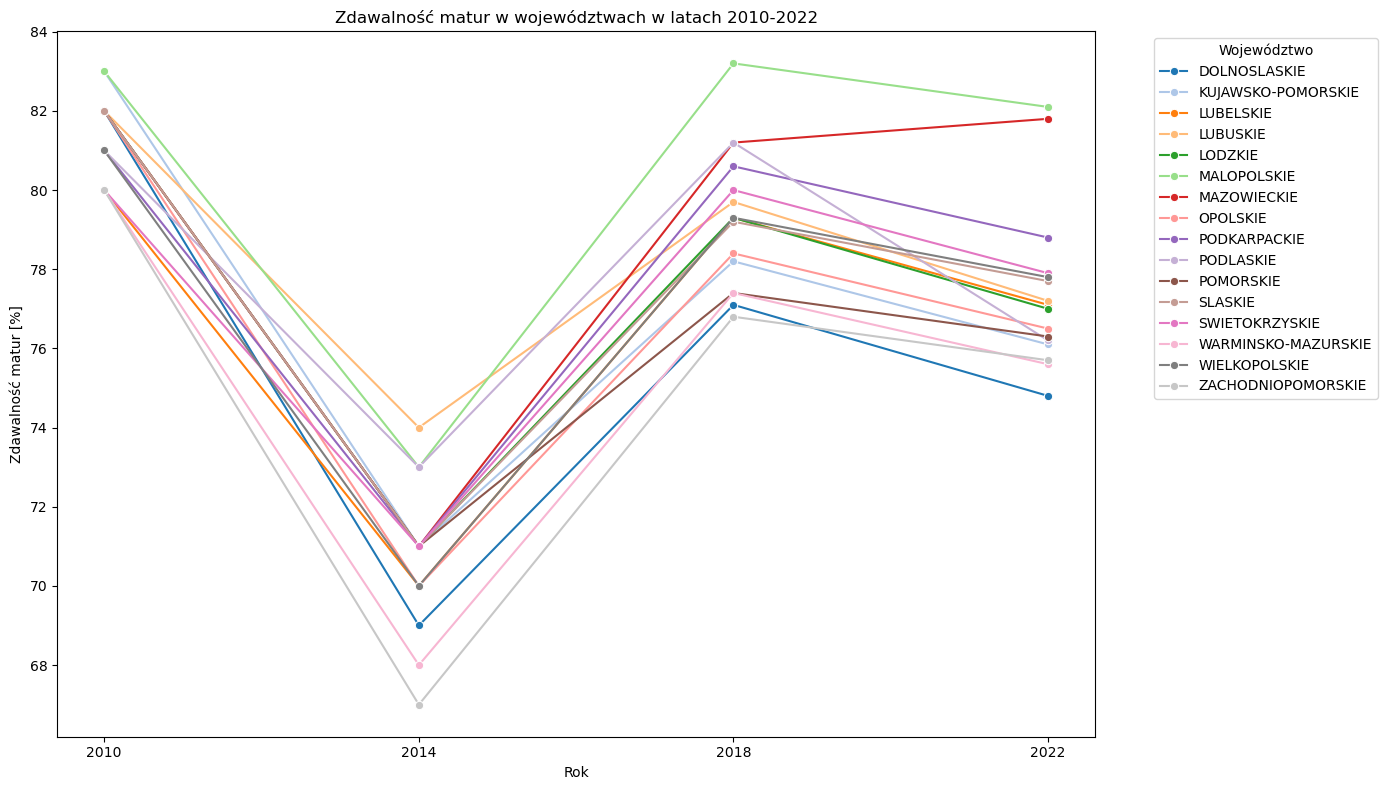

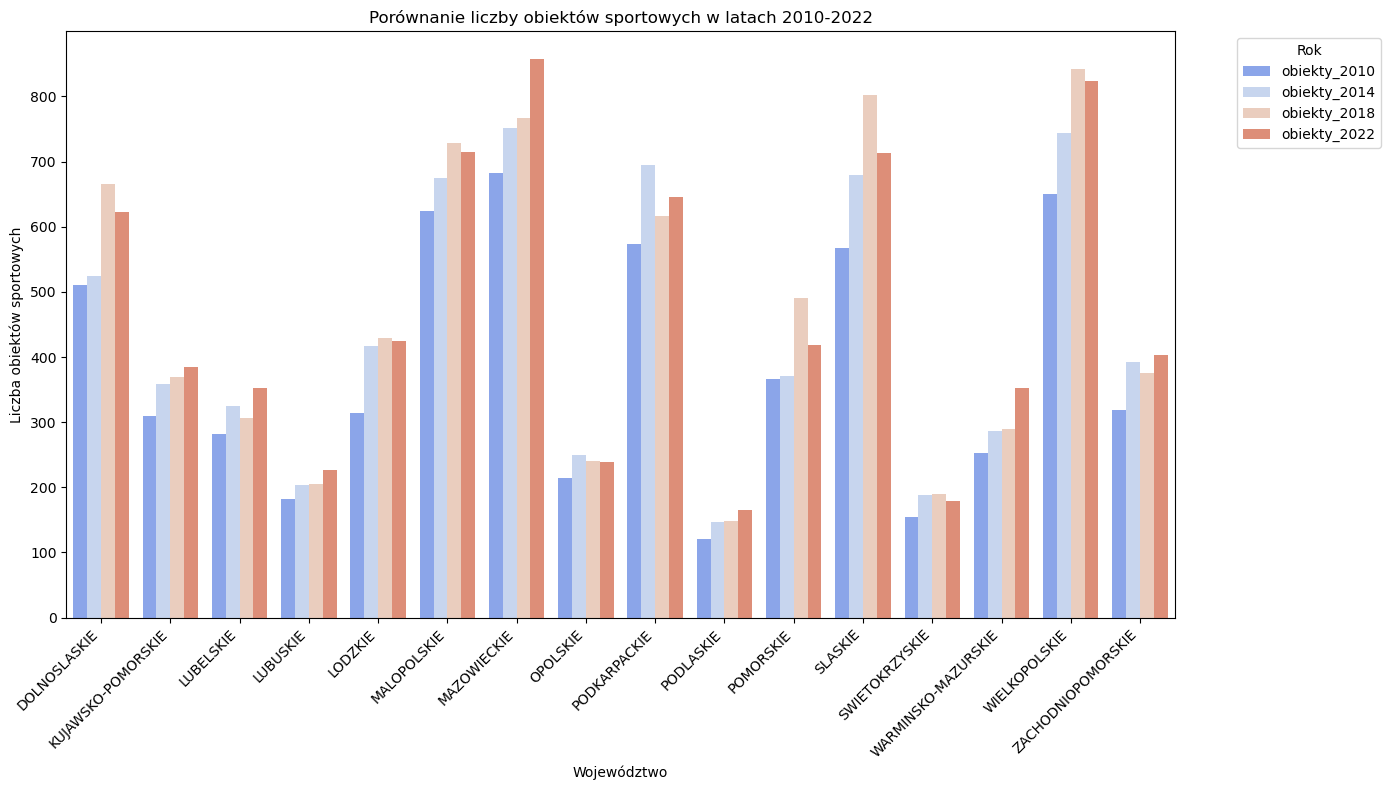

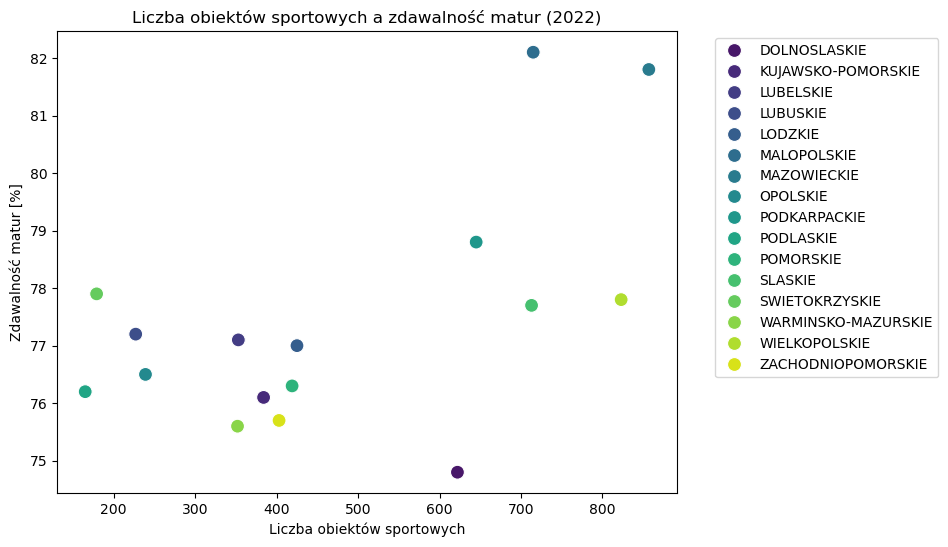

In [71]:
# Połączenie danych na podstawie kolumny "Nazwa"
merged_data = pd.merge(education, sports_object, on='Nazwa', how='inner')

# Sprawdzenie danych
print(merged_data.info())

# Tworzenie nowych kolumn sumujących liczby obiektów sportowych
merged_data['obiekty_2010'] = merged_data[['stadiony;2010', 'hale sportowe;2010', 'sale gimnastyczne;2010', 'korty tenisowe;2010', 'plywalnie kryte;2010']].sum(axis=1)
merged_data['obiekty_2014'] = merged_data[['stadiony;2014', 'hale sportowe;2014', 'sale gimnastyczne;2014', 'korty tenisowe;2014', 'plywalnie kryte;2014']].sum(axis=1)
merged_data['obiekty_2018'] = merged_data[['stadiony;2018', 'hale sportowe;2018', 'sale gimnastyczne;2018', 'korty tenisowe;2018', 'plywalnie kryte;2018']].sum(axis=1)
merged_data['obiekty_2022'] = merged_data[['stadiony;2022', 'hale sportowe;2022', 'sale gimnastyczne;2022', 'korty tenisowe;2022', 'plywalnie kryte;2022']].sum(axis=1)

# Sprawdzenie wyników po dodaniu nowych kolumn
print(merged_data.head())


#####################


# Upewnij się, że dane są w formacie tekstowym przed zastosowaniem .str.replace
columns_to_convert = ['2010[%]', '2014[%]', '2018[%]', '2022[%]']
for col in columns_to_convert:
    merged_data[col] = merged_data[col].astype(str).str.replace(',', '.').astype(float)

# Przygotowanie danych na potrzeby porównania zdawalności matur w różnych latach
matura_data = merged_data[['Nazwa', '2010[%]', '2014[%]', '2018[%]', '2022[%]']].melt(
    id_vars=['Nazwa'], 
    var_name='Rok', 
    value_name='Zdawalność matur [%]'
)

# Wyodrębnienie samego roku jako liczby
matura_data['Rok'] = matura_data['Rok'].str.extract(r'(\d+)')

# Tworzenie wykresu porównującego zdawalność matur
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=matura_data, 
    x='Rok', 
    y='Zdawalność matur [%]', 
    hue='Nazwa', 
    marker='o', 
    palette='tab20'
)
plt.title('Zdawalność matur w województwach w latach 2010-2022')
plt.xlabel('Rok')
plt.ylabel('Zdawalność matur [%]')
plt.legend(title='Województwo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()







##############################








import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Zakładam, że dane są już wczytane w `merged_data` i zawierają kolumny:
# 'Nazwa', 'obiekty_2010', 'obiekty_2014', 'obiekty_2018', 'obiekty_2022'

# Przygotowanie danych na potrzeby wykresu słupkowego
bar_data = merged_data[['Nazwa', 'obiekty_2010', 'obiekty_2014', 'obiekty_2018', 'obiekty_2022']].melt(
    id_vars=['Nazwa'], 
    var_name='Rok', 
    value_name='Liczba obiektów sportowych'
)

# Tworzenie wykresu słupkowego
plt.figure(figsize=(14, 8))
sns.barplot(
    data=bar_data, 
    x='Nazwa', 
    y='Liczba obiektów sportowych', 
    hue='Rok', 
    palette='coolwarm'
)
plt.title('Porównanie liczby obiektów sportowych w latach 2010-2022')
plt.xlabel('Województwo')
plt.ylabel('Liczba obiektów sportowych')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Rok', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()











#######################3


# 1. Scatter plot: Liczba obiektów sportowych vs zdawalność matur (2022)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_data, x='obiekty_2022', y='2022[%]', hue='Nazwa', palette='viridis', s=100)
plt.title('Liczba obiektów sportowych a zdawalność matur (2022)')
plt.xlabel('Liczba obiektów sportowych')
plt.ylabel('Zdawalność matur [%]')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


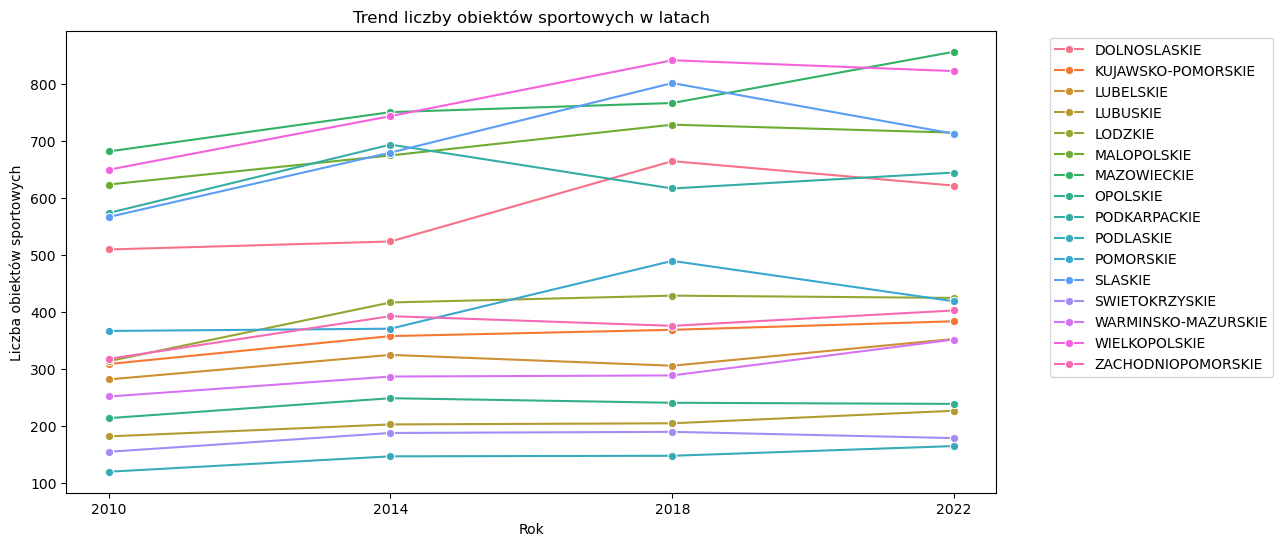

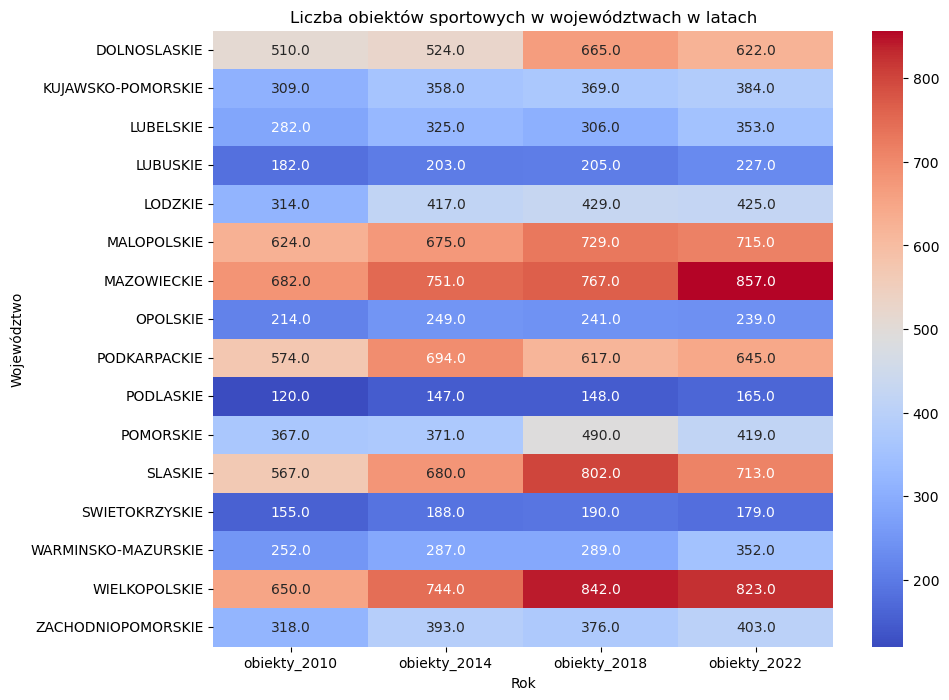

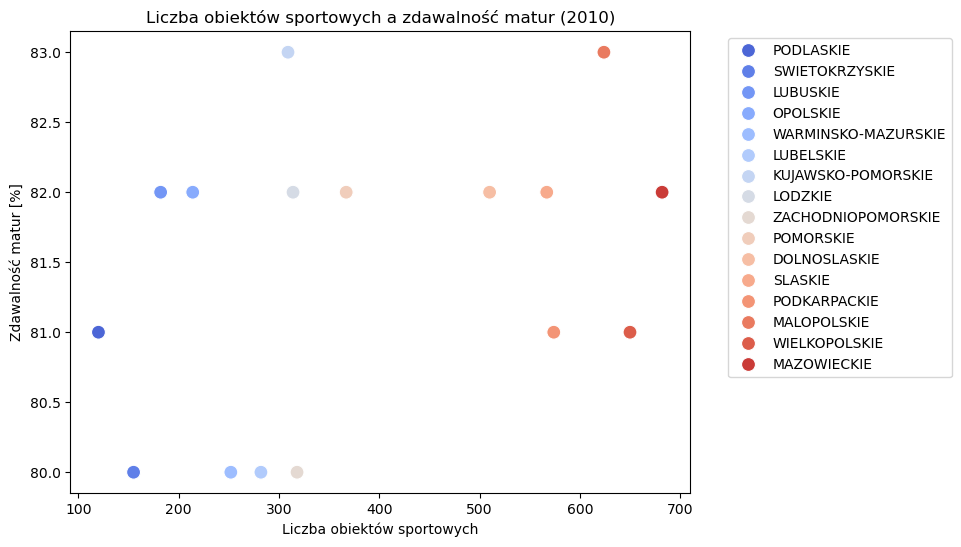

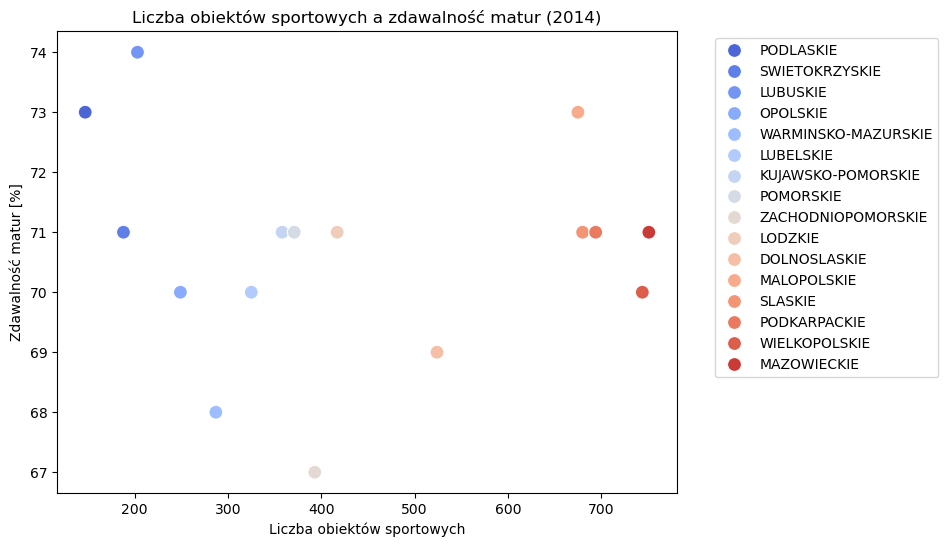

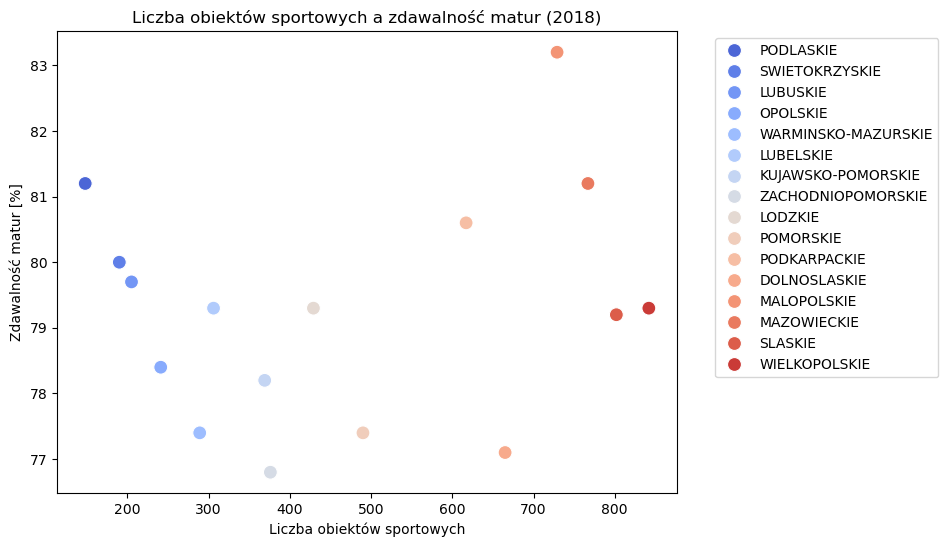

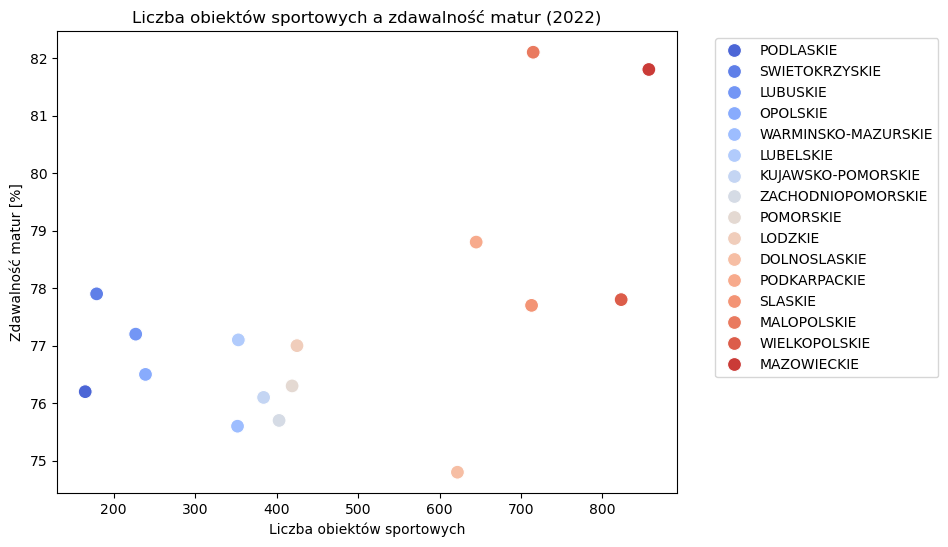

C:\Users\marty\AppData\Local\Temp\ipykernel_10180\3993185218.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=long_data, x='Rok', y='Liczba obiektów sportowych', palette='coolwarm')


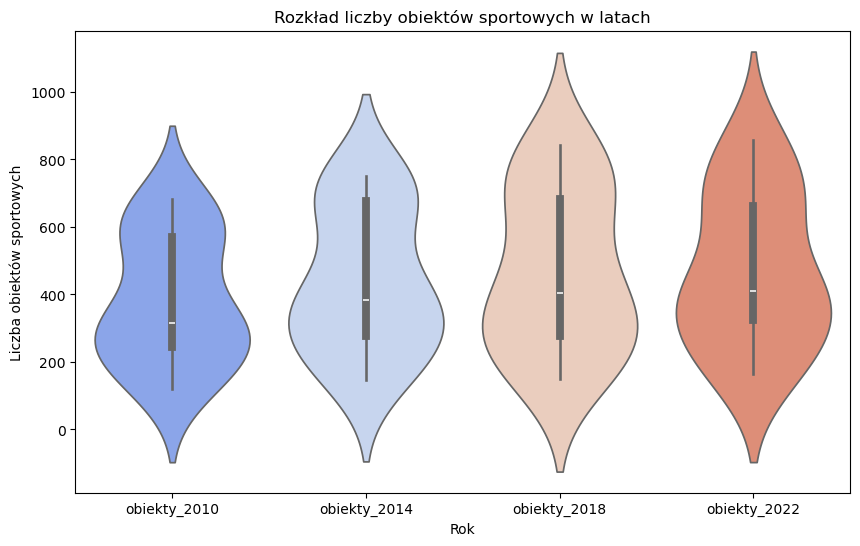

In [72]:


# 3. Trend liczby obiektów sportowych w latach (2010-2022)
years = ['2010', '2014', '2018', '2022']

# Przygotowanie danych do wykresu trendu
trend_data = merged_data[['Nazwa', 'obiekty_2010', 'obiekty_2014', 'obiekty_2018', 'obiekty_2022']].melt(id_vars='Nazwa', var_name='Rok', value_name='Liczba obiektów sportowych')
trend_data['Rok'] = trend_data['Rok'].str.extract(r'(\d+)', expand=False);

plt.figure(figsize=(12, 6))
sns.lineplot(data=trend_data, x='Rok', y='Liczba obiektów sportowych', hue='Nazwa', marker='o')
plt.title('Trend liczby obiektów sportowych w latach')
plt.xlabel('Rok')
plt.ylabel('Liczba obiektów sportowych')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 4. Heatmapa: Liczba obiektów sportowych w województwach w latach
heatmap_data = merged_data[['Nazwa', 'obiekty_2010', 'obiekty_2014', 'obiekty_2018', 'obiekty_2022']].set_index('Nazwa')

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Liczba obiektów sportowych w województwach w latach')
plt.xlabel('Rok')
plt.ylabel('Województwo')
plt.show()

# 5. Scatter plot: Korelacja zdawalności matur w latach 2010-2022 z obiektami
scatter_years = ['2010[%]', '2014[%]', '2018[%]', '2022[%]']
for year in scatter_years:
    # Tworzenie tymczasowego DataFrame posortowanego po liczbie obiektów sportowych dla danego roku
    sorted_data = merged_data.sort_values(by=f'obiekty_{year[:4]}')

    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=sorted_data, 
        x=f'obiekty_{year[:4]}', 
        y=year, 
        hue='Nazwa', 
        palette='coolwarm', 
        s=100
    )
    plt.title(f'Liczba obiektów sportowych a zdawalność matur ({year[:4]})')
    plt.xlabel('Liczba obiektów sportowych')
    plt.ylabel('Zdawalność matur [%]')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()





# Przygotowanie danych do violin plot (przekształcenie na format długi)
long_data = merged_data[['obiekty_2010', 'obiekty_2014', 'obiekty_2018', 'obiekty_2022']].melt(
    var_name='Rok', 
    value_name='Liczba obiektów sportowych'
)

# Violin plot dla wszystkich lat
plt.figure(figsize=(10, 6))
sns.violinplot(data=long_data, x='Rok', y='Liczba obiektów sportowych', palette='coolwarm')
plt.title('Rozkład liczby obiektów sportowych w latach')
plt.xlabel('Rok')
plt.ylabel('Liczba obiektów sportowych')
plt.show()

